### "Mashing" two images by generating images from weighted z vectors

In [1]:
import numpy as np
from numpy.linalg import norm
import matplotlib.pyplot as plt
from src.data_handling import VAE_data
from src.encoder import VAE
from src.net import build_vae_128 as net

data = VAE_data(img_resize=128)
data.load_images_list_from_directory('./data/img_align_celeba/')

autoencoder = VAE(net, img_size=128)
autoencoder.load_weights_from_checkpoint('./saved_models/celebA_128/model')

INFO:tensorflow:Restoring parameters from ./saved_models/celebA_128/model


In order to find interpolations between 2 z vectors, we use approximated polar coordinates path instead of a simple linear combination. This approach makes sense because the shape of the latent space of a VAE is forced to be gaussian like, and when we walk between two points, we want to go through points with similar variance. we use a Slerp path, similar to what was done in https://arxiv.org/pdf/1609.04468.pdf. 

In [2]:
def slerp(z1, z2, t):
    '''
    z1, z2 - two vectors in the latent space
    t - weighted ratio of the output interpolated vector
    '''
    omega = np.arccos(np.dot(z1/norm(z1), z2.T/norm(z2)))
    sin_omega = np.sin(omega)
    z_out = np.sin((1.0-t)*omega) / sin_omega * z1 + np.sin(t*omega) / sin_omega * z2
    return z_out

def plot_z_steps(autoencoder, img1, img2):
    shape = img1.shape
    z1 = autoencoder.get_z(img1)
    z2 = autoencoder.get_z(img2)
    f = plt.figure(figsize=(14,3))
    plt.subplot(1,9,1)
    plt.imshow(img1.reshape(shape))
    plt.axis('off')
    for i, t in enumerate([0, 0.25, 0.4, 0.5, 0.6, 0.75, 1.0]):    
        z3 = slerp(z1, z2, t) 
        mashed = autoencoder.get_img_from_z(z3)
        plt.subplot(1,9,i+2)
        plt.imshow(np.clip(mashed.reshape(shape), 0, 1))
        plt.axis('off')
    plt.subplot(1,9,9)
    plt.imshow(img2.reshape(shape))
    plt.axis('off')
    plt.show()

### Some hand picked samples

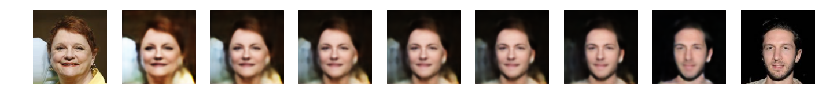

In [3]:
plot_z_steps(autoencoder, data.get_image(75695), data.get_image(103910))

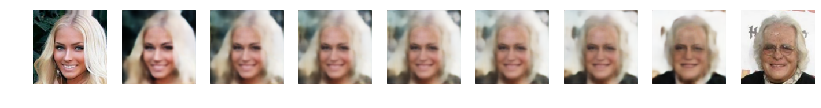

In [4]:
plot_z_steps(autoencoder, data.get_image(125), data.get_image(10326))

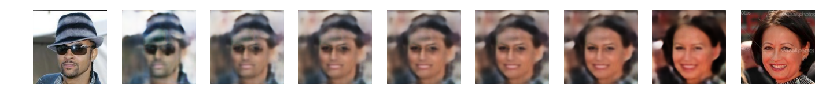

In [5]:
plot_z_steps(autoencoder, data.get_image(149027), data.get_image(3910))

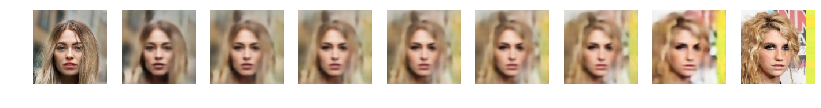

In [6]:
plot_z_steps(autoencoder, data.get_image(1264), data.get_image(13033))

### Some randomally selected samples

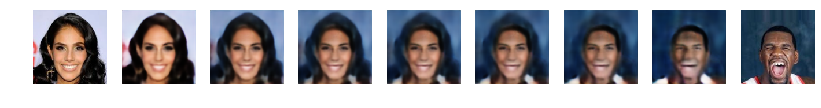

In [8]:
idx1, idx2 = np.random.randint(data.Nimages, size=2)
plot_z_steps(autoencoder, data.get_image(idx1), data.get_image(idx2))

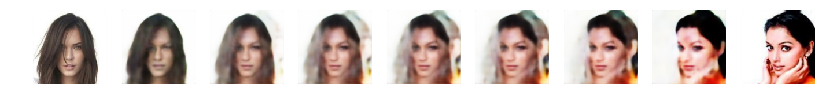

In [9]:
idx1, idx2 = np.random.randint(data.Nimages, size=2)
plot_z_steps(autoencoder, data.get_image(idx1), data.get_image(idx2))

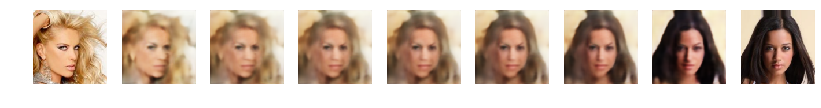

In [10]:
idx1, idx2 = np.random.randint(data.Nimages, size=2)
plot_z_steps(autoencoder, data.get_image(idx1), data.get_image(idx2))

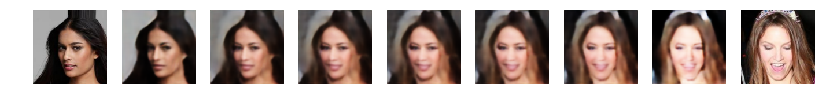

In [22]:
idx1, idx2 = np.random.randint(data.Nimages, size=2)
plot_z_steps(autoencoder, data.get_image(idx1), data.get_image(idx2))